In [40]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io , color

In [57]:
model = tf.keras.models.load_model(r"C:\Users\91898\Desktop\Convolutional Neural Network\new\cnn_2.h5")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 8)       136       
                                                                 
 re_lu_2 (ReLU)              (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        528       
                                                                 
 re_lu_3 (ReLU)              (None, 16, 16, 16)        0         
                                                             

In [50]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name , filters.shape)

conv2d (6, 6, 1, 8)
conv2d_1 (2, 2, 8, 16)


In [15]:
filters, biases = model.layers[1].get_weights()
filters.shape

(4, 4, 1, 8)

In [14]:
f_min , f_max = filters.min(),filters.max()
filters = (filters-f_min/(f_max-f_min))

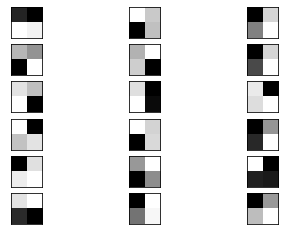

In [65]:
n_filters = 6
ix = 1 
for i in range(n_filters):
    f = filters[:,:,:,i]
    for j in range(3):
        ax = plt.subplot(n_filters,3,ix)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(f[:,:,j],cmap ='gray')
        ix+=1
        
plt.show()

In [24]:
(np.array(model.layers[1].get_weights())).shape

<ipython-input-24-e035b16bb2d8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (np.array(model.layers[1].get_weights())).shape


(2,)

In [31]:
filters[:,:,:,7].shape

(4, 4, 1)

In [60]:
filters.shape

(2, 2, 8, 16)

In [76]:
model = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

In [77]:
def resize(img_address):
    import cv2 
    img = cv2.imread(img_address)
    image = cv2.resize(img,(128,128))
    return image

def grayscale(image_address):
    from skimage import io,color
    
    image = color.rgb2gray(image_address)
    io.imshow(image)
        
    
    return image

3

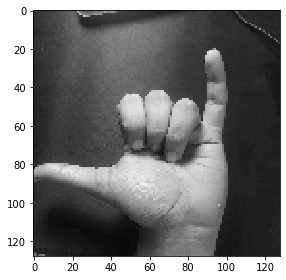

In [78]:
image_address = r"C:/Users/91898/Downloads/IMG_20221106_013114.jpg"

img = resize(image_address)

image = grayscale(img)
#image = gauss(image)
image = np.expand_dims(image,0)
len(image.shape)

In [79]:
pred = model.predict(image)
pred.shape

1/1 [==============================] - 0s 35ms/step


(1, 128, 128, 8)

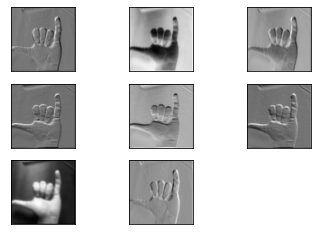

In [80]:
square = 3
ix = 1
for _ in range(square):
    for _ in range(square):
        if ix == 9:
            break
        else:
            ax = plt.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(pred[0,:,:,ix-1] , cmap='gray')
            ix += 1 
        
plt.show()

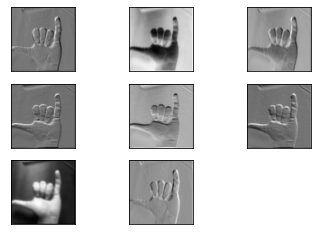

In [81]:
square = 3
ix = 1
for _ in range(square):
    for _ in range(square):
        if ix == 9:
            break
        else:
            ax = plt.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(pred[0,:,:,ix-1] , cmap='gray')
            ix += 1 
        
plt.show()